# 1. Introduction

There is a lot of information on runners and their performance for the
Boston Marathon. Pick a year (post-2012 has more info) and do some
clustering.
Specifically, use the tools at hand to determine which clustering
solution, including number of clusters and algorithm used, is best for
the marathon data. Once you have a solution you like, write a data
story, including visualizations, where you teach the reader something
about the Boston Marathon based on your clusters. Write up your
report, including your process from start to finish. You must include
analysis as:

1. Draw bar graphs (both male & female in different color) for each
cluster for male and female, from the bar graphs, you can tell things
as which cluster contains the most number of female (or male).

2. Draw bar graphs for runners in different ranges of age (dividing by 3
groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors),
from the graph, you should be able to anwser which cluster contains
the most young people, which cluster contains oldest people, etc.

3. Do the same things as above for finishing time (which group runs
fastest).

In [73]:
import pandas as pd
import numpy as np # linear algebra
import scipy
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.cm as cm


In [74]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./data.csv")
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [75]:
data.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [76]:
data.describe(include='O')

,10k,name,25k,gender,bib,ctz,35k,state,30k,5k,half,20k,country,city,40k
count,31984,31984,31984,31984,31984,1244,31984,29408,31984,31984,31984,31984,31984,31983,31984
unique,2766,31915,6570,2,31984,84,9516,68,8090,1491,5651,5375,78,5934,10546
top,-,"Johnson, Patrick",-,M,12653,GBR,-,MA,-,23.93,-,-,USA,Boston,-
freq,50,2,216,17617,1,171,34,7587,40,81,72,51,27233,1034,39


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [78]:
data_male = data[data['gender'] == 'M']
data_female = data[data['gender'] == 'F']

In [79]:
# Data transform 

In [80]:
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
data[numeric] = data[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)
print(data.dtypes)

10k          float64
name          object
division       int64
25k          float64
gender        object
age          float64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall      float64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object


# 2. Data exploring

## 2.1. Age 

Text(0.5, 1.0, 'Participants per age group')

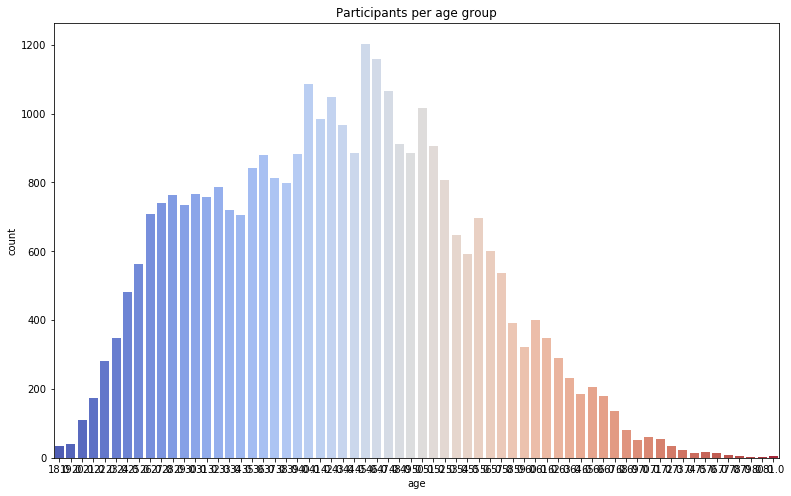

In [82]:
g = sns.countplot('age', data=data, palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Participants per age group")

## 2.2. Age and gender

Text(0.5, 1.0, 'Participants per Age & Gender')

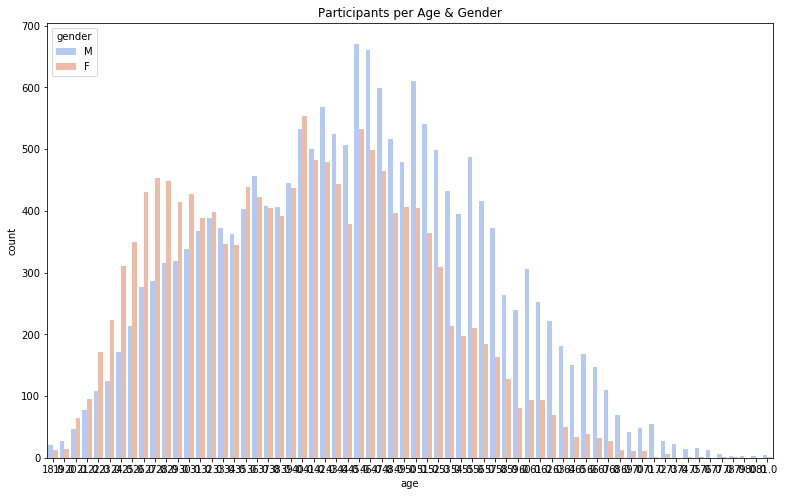

In [84]:
g = sns.countplot('age', data=data, palette="coolwarm", hue='gender')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age & Gender")

## Boxplot by age and gender

Text(0.5, 1.0, 'Distribution of finish times per Age group')

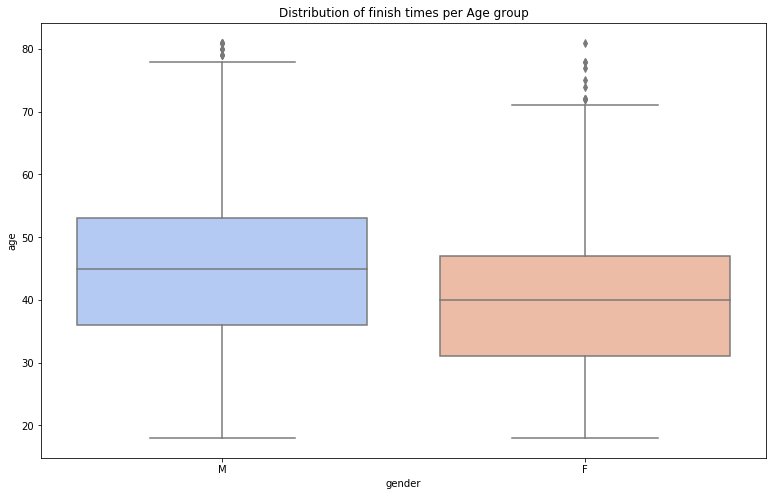

In [86]:
g = sns.boxplot(data['gender'], data['age'], palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Distribution of finish times per Age group")

## 2.3. Finish time

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


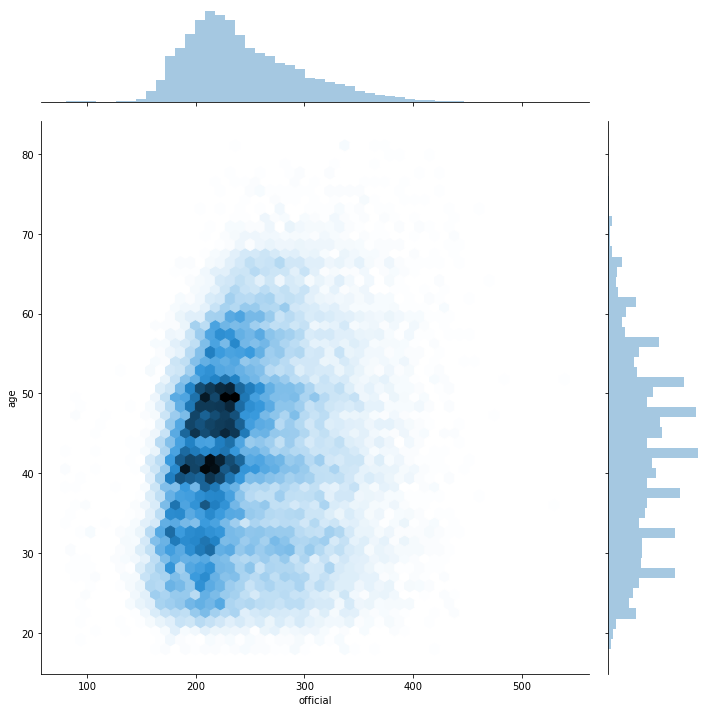

In [87]:
g = sns.jointplot( x=data['official'], y=data['age'], stat_func=None, kind='hex',  size=10)

## 2.4. Country

Text(0.5, 1.0, 'Most popular Country')

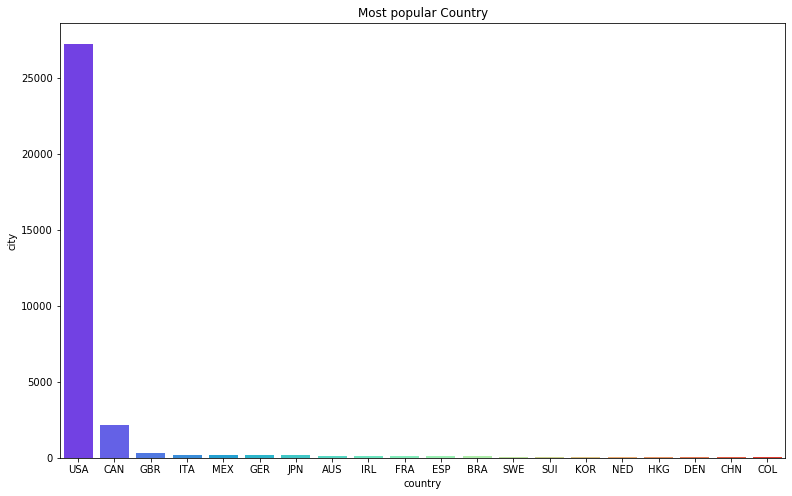

In [88]:
s = data.groupby('country').count()['city'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country")

# 3. Data transformation

In [90]:
data['gender_bin'] = data['gender']
data['gender_bin'] = data['gender_bin'].str.replace('M','0')
data['gender_bin'] = data['gender_bin'].str.replace('F','1')
data['gender_bin'] = pd.to_numeric(data['gender_bin'], errors='coerce')

drop = ['name','gender','bib','ctz','state','country','city']
numeric.append('gender_bin')
dropna2014 = data.dropna(subset = numeric)
print(len(dropna2014))

numeric2014 = dropna2014.drop(drop, axis=1)
print(numeric2014.dtypes)
print(numeric2014.head())

31649
10k           float64
division        int64
25k           float64
age           float64
official      float64
genderdiv       int64
35k           float64
overall       float64
pace          float64
30k           float64
5k            float64
half          float64
20k           float64
40k           float64
gender_bin      int64
dtype: object
     10k  division    25k   age  official  genderdiv     35k  overall  pace  \
0  17.37         8  47.67  47.0     85.25          8   71.40      8.0  3.27   
1  32.58         1  82.43  33.0    138.95          1  116.37     21.0  5.30   
2  16.62         1  45.80  41.0     80.60          1   67.42      1.0  3.08   
3  32.57         3  82.43  24.0    140.58          3  116.37     27.0  5.37   
4  17.12         2  46.37  40.0     81.23          2   67.83      2.0  3.10   

     30k     5k   half    20k     40k  gender_bin  
0  59.18   8.02  39.72  37.65   80.43           0  
1  99.33  16.22  69.47  65.83  132.10           1  
2  56.45   7.75  38

# 4. Clustering by applying KMean 

## The Elbow Method

The Elbow Method is then used to choose the best K value. In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

In [98]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(numeric2014)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

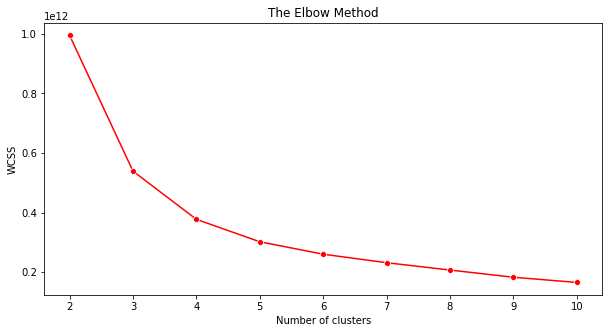

In [100]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We will choose 5 for number of cluster.

In [101]:
# Fitting K-Means to the dataset
best_cluster_num = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(numeric2014)


In [106]:
numeric2014['cluster_label'] = y_kmeans

In [107]:
numeric2014.head() 

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_bin,cluster_label
0,17.37,8,47.67,47.0,85.25,8,71.40,8.0,3.27,59.18,8.02,39.72,37.65,80.43,0,2
1,32.58,1,82.43,33.0,138.95,1,116.37,21.0,5.30,99.33,16.22,69.47,65.83,132.10,1,2
2,16.62,1,45.80,41.0,80.60,1,67.42,1.0,3.08,56.45,7.75,38.03,36.10,76.10,0,2
3,32.57,3,82.43,24.0,140.58,3,116.37,27.0,5.37,99.33,16.20,69.47,65.83,132.95,1,2
4,17.12,2,46.37,40.0,81.23,2,67.83,2.0,3.10,57.03,8.02,38.60,36.58,76.72,0,2


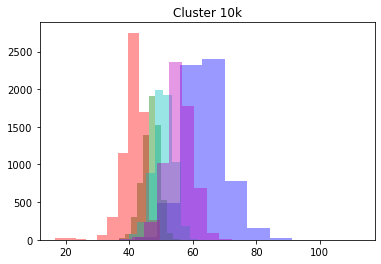

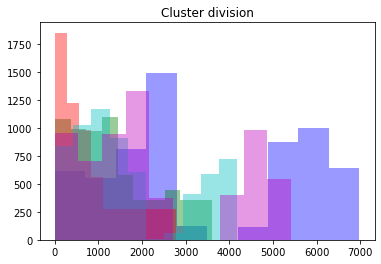

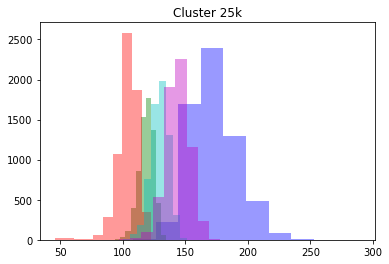

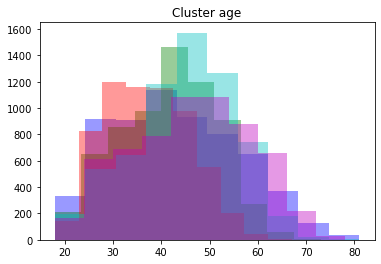

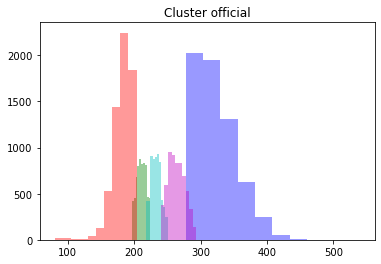

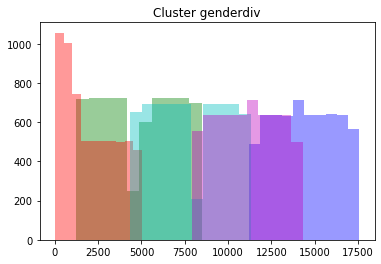

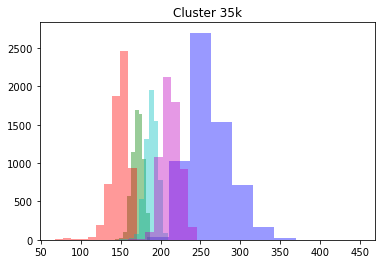

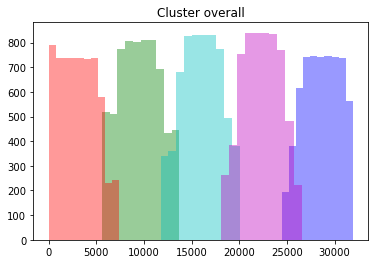

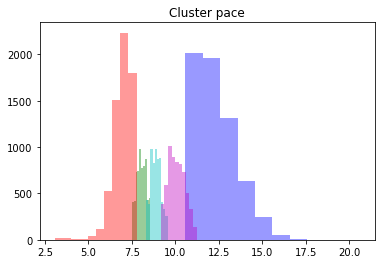

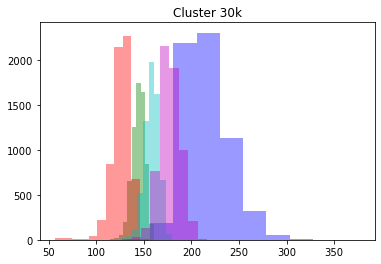

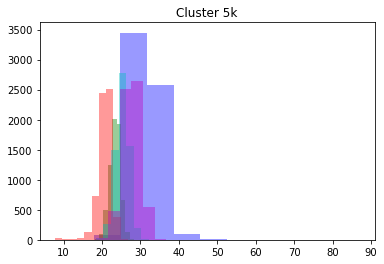

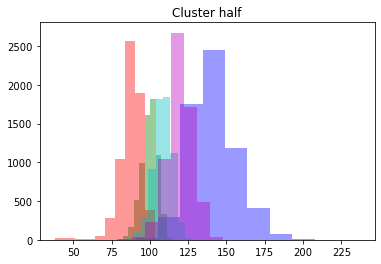

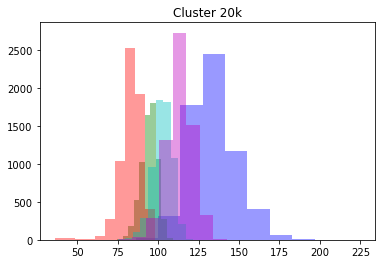

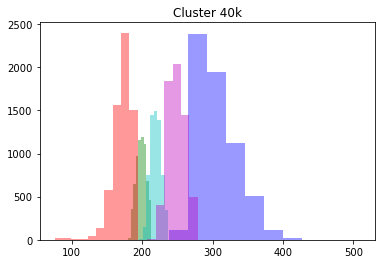

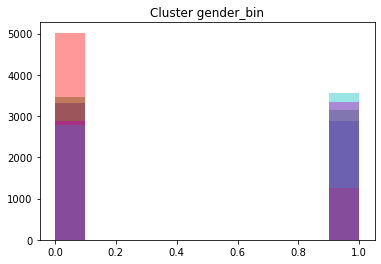

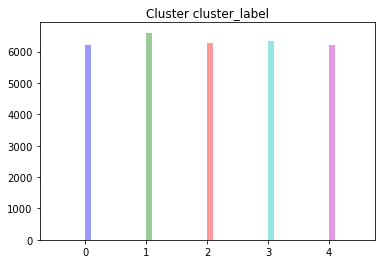

In [112]:
best_cluster_num = 5
cluster_dataframes = {}
colors = ['b', 'g', 'r', 'c', 'm']
for n_clust in range(best_cluster_num):
     cluster_dataframes[n_clust] = numeric2014.loc[numeric2014['cluster_label'] == n_clust]
for column in numeric2014:
    for i in range(best_cluster_num):
        plt.hist(cluster_dataframes[i][column], alpha=0.4, color=colors[i])
        
    plt.title(f'Cluster {column}')
    plt.show()

# 5. Question

##  5.1. Draw bar graphs (both male & female in different color) for each cluster for male and female, from the bar graphs, you can tell things as which cluster contains the most number of female (or male).

Text(0.5, 1.0, 'Participants per Age group')

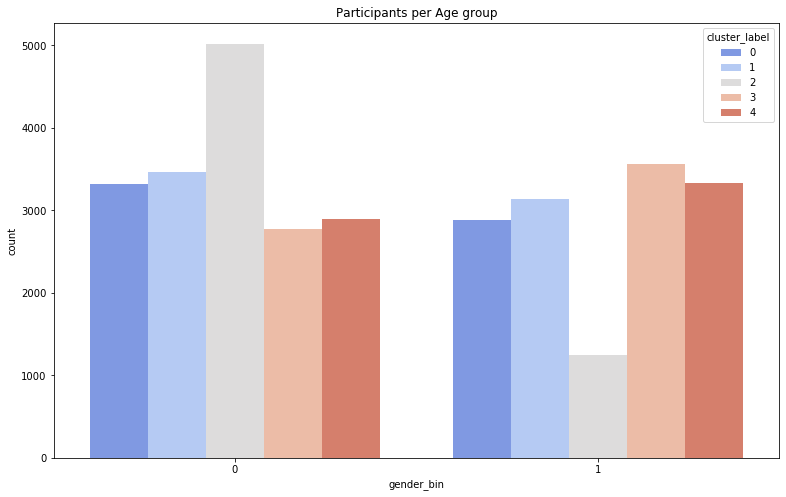

In [119]:
g = sns.countplot('gender_bin', data=numeric2014, palette="coolwarm", hue='cluster_label')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age group")

Cluster 2 contains most number of male  

Cluster 3 contains most number of female  

# 5.2. Draw bar graphs for runners in different ranges of age (dividing by 3 groups: 18-25, 26-40, 40-70 or so)

In [113]:
def divide_age(x):
    if (x >= 18 and x <= 25):
        return 0
    if (x > 25 and x < 41):
        return 1
    return 2
numeric2014['age_group'] = numeric2014['age'].apply(lambda x: divide_age(x))
numeric2014.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_bin,cluster_label,age_group
0,17.37,8,47.67,47.0,85.25,8,71.40,8.0,3.27,59.18,8.02,39.72,37.65,80.43,0,2,2
1,32.58,1,82.43,33.0,138.95,1,116.37,21.0,5.30,99.33,16.22,69.47,65.83,132.10,1,2,1
2,16.62,1,45.80,41.0,80.60,1,67.42,1.0,3.08,56.45,7.75,38.03,36.10,76.10,0,2,2
3,32.57,3,82.43,24.0,140.58,3,116.37,27.0,5.37,99.33,16.20,69.47,65.83,132.95,1,2,0
4,17.12,2,46.37,40.0,81.23,2,67.83,2.0,3.10,57.03,8.02,38.60,36.58,76.72,0,2,1


In [118]:
# cluster_dataframes = {}
# colors = ['b', 'g', 'r', 'c', 'm']
# for n_clust in range(best_cluster_num):
#      cluster_dataframes[n_clust] = numeric2014.loc[numeric2014['cluster_label'] == n_clust]

# for i in range(best_cluster_num):
#     plt.hist(cluster_dataframes[i]['age_group'], alpha=0.4, facecolor=colors[i])
        
# plt.title(f'Cluster age_group')
# plt.show()

Text(0.5, 1.0, 'Participants per Age & Gender')

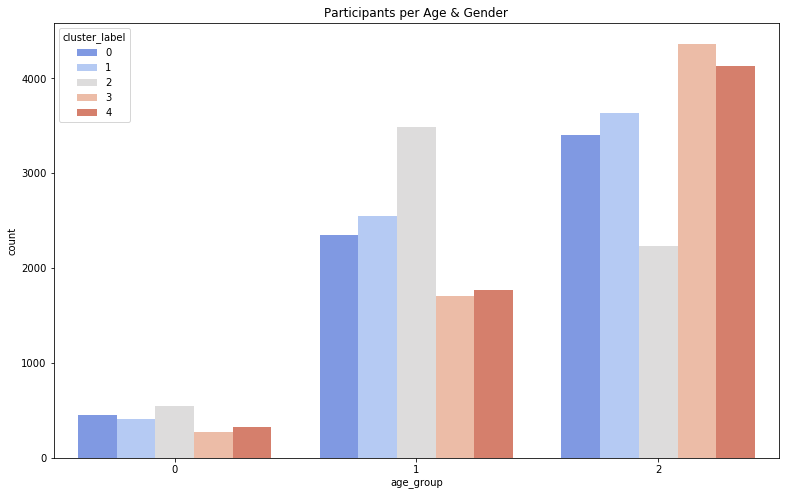

In [117]:
g = sns.countplot('age_group', data=numeric2014, palette="coolwarm", hue='cluster_label')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age group")

Cluster 2 contains most number of young people 

Cluster 3 contains most number of oldest people 

## 5.3. Do the same things as above for finishing time

In [120]:
numeric2014.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_bin,cluster_label,age_group
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,133.581175,42.385067,241.952383,8002.921988,196.033373,15833.958924,9.236463,163.894883,25.678261,111.211481,105.321404,228.189990,0.447565,1.992417,1.497930
std,8.710102,1704.843679,25.571480,11.299795,50.842552,4733.255987,40.775036,9182.223743,1.939150,32.889354,4.215381,20.306387,19.159500,48.074493,0.497251,1.407272,0.614076
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000,0.000000,0.000000,0.000000
25%,45.370000,607.000000,115.430000,33.000000,205.300000,3940.000000,166.950000,7880.000000,7.830000,140.520000,22.620000,96.750000,91.670000,193.620000,0.000000,1.000000,1.000000
50%,50.280000,1418.000000,128.850000,42.000000,231.980000,7919.000000,187.850000,15829.000000,8.850000,157.500000,25.050000,107.680000,102.000000,218.470000,0.000000,2.000000,2.000000
75%,57.000000,2601.000000,147.700000,50.000000,272.200000,11893.000000,219.370000,23785.000000,10.380000,182.200000,28.400000,122.680000,116.150000,256.570000,1.000000,3.000000,2.000000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000,1.000000,4.000000,2.000000


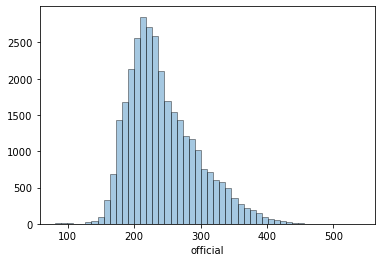

In [124]:
sns.distplot(data['official'], kde = False,hist_kws=dict(edgecolor="k"))

Text(0.5, 1.0, 'Participants per finish time')

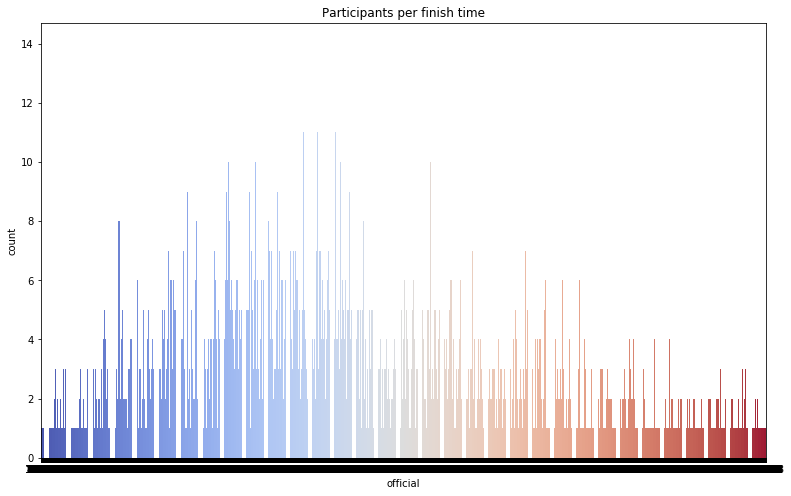

In [123]:
# g = sns.countplot('official', data=numeric2014, palette="coolwarm")
# g.figure.set_size_inches(13,8)
# g.set_title("Participants per finish time")

In [129]:
def divide_offical(x):
    if (x > 80 and x <= 150):
        return 0
    if (x > 150 and x <= 200):
        return 1
    if (x > 200 and x <= 250):
        return 2
    if (x > 250 and x <= 350):
        return 3
    return 4
numeric2014['official_group'] = numeric2014['official'].apply(lambda x: divide_offical(x))
numeric2014.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_bin,cluster_label,age_group,official_group
0,17.37,8,47.67,47.0,85.25,8,71.40,8.0,3.27,59.18,8.02,39.72,37.65,80.43,0,2,2,0
1,32.58,1,82.43,33.0,138.95,1,116.37,21.0,5.30,99.33,16.22,69.47,65.83,132.10,1,2,1,0
2,16.62,1,45.80,41.0,80.60,1,67.42,1.0,3.08,56.45,7.75,38.03,36.10,76.10,0,2,2,0
3,32.57,3,82.43,24.0,140.58,3,116.37,27.0,5.37,99.33,16.20,69.47,65.83,132.95,1,2,0,0
4,17.12,2,46.37,40.0,81.23,2,67.83,2.0,3.10,57.03,8.02,38.60,36.58,76.72,0,2,1,0


In [130]:
numeric2014.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_bin,cluster_label,age_group,official_group
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,133.581175,42.385067,241.952383,8002.921988,196.033373,15833.958924,9.236463,163.894883,25.678261,111.211481,105.321404,228.189990,0.447565,1.992417,1.497930,2.192834
std,8.710102,1704.843679,25.571480,11.299795,50.842552,4733.255987,40.775036,9182.223743,1.939150,32.889354,4.215381,20.306387,19.159500,48.074493,0.497251,1.407272,0.614076,0.809920
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000,0.000000,0.000000,0.000000,0.000000
25%,45.370000,607.000000,115.430000,33.000000,205.300000,3940.000000,166.950000,7880.000000,7.830000,140.520000,22.620000,96.750000,91.670000,193.620000,0.000000,1.000000,1.000000,2.000000
50%,50.280000,1418.000000,128.850000,42.000000,231.980000,7919.000000,187.850000,15829.000000,8.850000,157.500000,25.050000,107.680000,102.000000,218.470000,0.000000,2.000000,2.000000,2.000000
75%,57.000000,2601.000000,147.700000,50.000000,272.200000,11893.000000,219.370000,23785.000000,10.380000,182.200000,28.400000,122.680000,116.150000,256.570000,1.000000,3.000000,2.000000,3.000000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000,1.000000,4.000000,2.000000,4.000000


Text(0.5, 1.0, 'Participants per Age group')

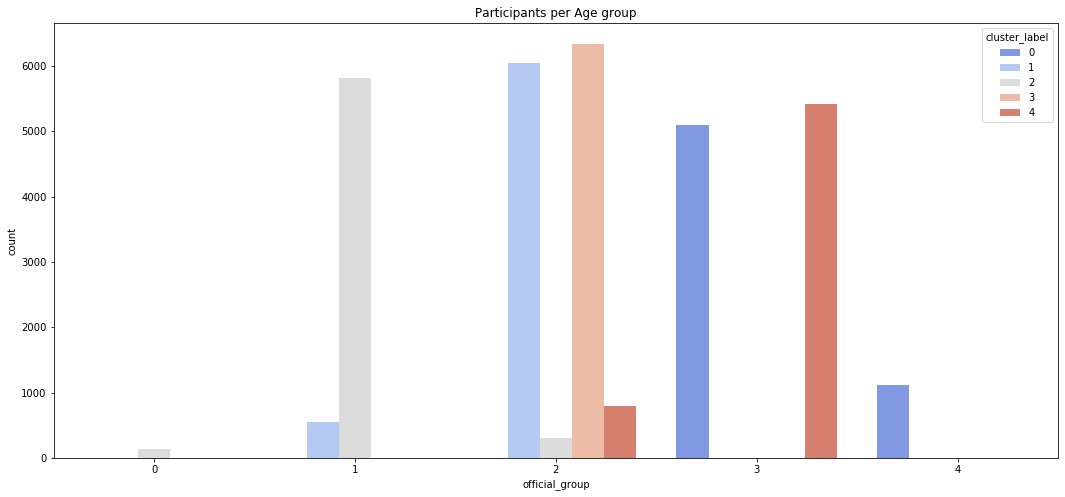

In [132]:
g = sns.countplot('official_group', data=numeric2014, palette="coolwarm", hue='cluster_label')
g.figure.set_size_inches(18,8)
g.set_title("Participants per Age group")

In [ ]:
Cluster group 2 run fastest

Cluster group 0 run slowest 

# 6. Conclusion

In [ ]:
We use the Elbow Method to determine best number of cluster. The best number of cluster for this dataset is 5.
Base on clustering result, we can find which group run fastest, contains most male or female, contains young, oldest people.
